## AG1 - ACTIVIDAD GUIADA 1
### Asignatura: Algoritmos de Optimización
### Laura Katherine Henao González

Repositorio GitHub:

### Divide y vencerás (I)

**Características que permiten identificar problemas aplicables:**
1. El problema puede ser dividido en problemas más pequeños, pero de la
misma naturaleza que el principal.
2. Es posible resolver estos sub-problemas de manera recursiva o de otra
manera sencilla (caso simple).
3. Es posible combinar las soluciones de los sub-problemas para componer la
solución al problema principal.
4. Los sub-problemas son disjuntos entre sí. No hay solapamiento entre los
sub-problemas.
5. Debemos asegurar que el proceso de divisiones recursivas finaliza en algún
momento.

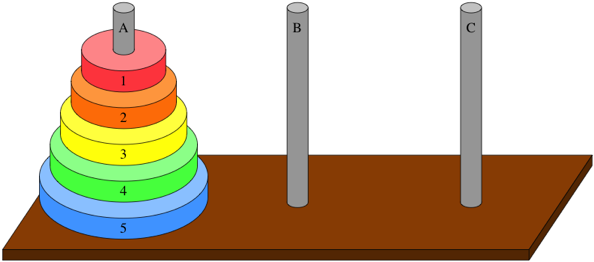

In [20]:
def torres_hanoi(N, origen, destino, auxiliar):
    if N == 1:
        print(f"Mover disco desde {origen} a {destino}")
        return
    
    torres_hanoi(N-1,origen,auxiliar,destino)
    print(f"Mover disco desde {origen} a {destino}")
    torres_hanoi(N-1,auxiliar,destino,origen)
    
torres_hanoi(4,1,3,2)

Mover disco desde 1 a 2
Mover disco desde 1 a 3
Mover disco desde 2 a 3
Mover disco desde 1 a 2
Mover disco desde 3 a 1
Mover disco desde 3 a 2
Mover disco desde 1 a 2
Mover disco desde 1 a 3
Mover disco desde 2 a 3
Mover disco desde 2 a 1
Mover disco desde 3 a 1
Mover disco desde 2 a 3
Mover disco desde 1 a 2
Mover disco desde 1 a 3
Mover disco desde 2 a 3


## Técnica Voraz. Algoritmos voraces(I) - (Greedy algorithms)

*Definición: Basada en la división del problema por etapas, eligiendo en cada etapa
una decisión para construir la solución que resulte la más adecuada o ambiciosa sin
considerar las consecuencias. Las decisiones descartadas serán descartadas para
siempre. Resumen: elegir en cada etapa la decisión óptima.*

**Características que permiten identificar problemas aplicables:**

1. Conjunto de candidatos (elementos seleccionables por etapas)
2. Solución parcial
3. Función de selección para determinar el mejor candidato en cada etapa.
4. Función objetivo
5. Función de factibilidad que asegure que una selección parcial es “prometedora”
6. Criterio o función que compruebe que una solución parcial ya es una solución final.

**Problema: Cambio de monedas**
    
Buscar las monedas para completar la cantidad con el sistema [25, 10, 5, 1]
1. Definimos la función : cambio_monedas con dos parámetros: Cantidad a calcular y sistema monetario
2. Inicializamos la variable(lista) SOLUCION a cero con tantos valores como tipos de monedas.
3. Inicializamos la variable VALOR_ACUMULADO para contener el valor acumulado actual
4. Recorremos todas las monedas en orden decreciente en valor (voracidad)
- Calculamos el máximo de monedas posibles en cada iteración: *monedas = int( (CANTIDAD-VALOR_ACULULADO)/SISTEMA[i])*
- Actualizamos: *SOLUCION y VALOR_ACUMULADO*
- Si llegamos a la cantidad devolvemos la solución: *if VALOR_ACULULADO == CANTIDAD: return SOLUCION*

In [21]:
def cambio_moneda(CANTIDAD, SISTEMA):

    print("SISTEMA: ")
    print(SISTEMA)
    
    SOLUCION = [0 for i in range(len(SISTEMA))]      #Inicializamos el array que contendrá la candtidad de monedas de cada valor
    VALOR_ACUMULADO = 0                              #Inicializamos el valor acumulado
    
    for i in range(len(SISTEMA)):                    #Recorremos el sistema monetario (Conjunto de candidatos)
        monedas = int ((CANTIDAD-VALOR_ACUMULADO)/SISTEMA[i])  #Calcula la cantidad de monedas de valor SISTEMA[i] (Función de selección)
        SOLUCION[i] = monedas                        #Añde número de monedas a la solución
        VALOR_ACUMULADO += monedas * SISTEMA[i]
        if VALOR_ACUMULADO == CANTIDAD: return SOLUCION        #Finalizamos si ya hemos llegado a la solucion (criterio de solución final)
    
    return SOLUCION
                       
SISTEMA = [25,10,5,1]
cambio_moneda(27, SISTEMA)

SISTEMA: 
[25, 10, 5, 1]


[1, 0, 0, 2]

### Problema: Encontrar los dos puntos más cercanos

- Dado un conjunto de puntos se trata de encontrar los dos puntos más cercanos
- Guía para aprendizaje:

1. Suponer en 1D, o sea, una lista de números: [3403,4537,9089,9746,7259,…]
2. Primer intento: Fuerza bruta
3. Calcular la complejidad. ¿Se puede mejorar?
4. Segundo intento. Aplicar Divide y Vencerás
5. Calcular la complejidad. ¿Se puede mejorar?
6. Extender el algoritmo a 2D: [(1122,6175),(135,4076),(7296,2741) …]
7. Extender el algoritmo a 3D.


In [22]:
import random
import math

# Generar listas de números aleatorios en 1D, 2D y 3D
lista_1D = [random.randrange(1,10000) for _ in range(1000)]
lista_2D = [(random.randrange(1,10000), random.randrange(1,10000)) for _ in range(1000)]
lista_3D = [(random.randrange(1,10000), random.randrange(1,10000), random.randrange(1,10000)) for _ in range(1000)]

def distancia_1D(p1, p2):
    return abs(p1 - p2)

def distancia_multi(p1, p2):
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(p1, p2)))

def cercanos_bruto_1D(L):
    min_d = distancia_1D(L[0], L[1])
    min_p = (L[0], L[1])
    for i in range(len(L)):
        for j in range(i + 1, len(L)):
            if distancia_1D(L[i], L[j]) < min_d:
                min_d = distancia_1D(L[i], L[j])
                min_p = (L[i], L[j])
    return min_p

def cercanos_bruto_multi(L):
    min_d = distancia_multi(L[0], L[1])
    min_p = (L[0], L[1])
    for i in range(len(L)):
        for j in range(i + 1, len(L)):
            if distancia_multi(L[i], L[j]) < min_d:
                min_d = distancia_multi(L[i], L[j])
                min_p = (L[i], L[j])
    return min_p

def cercanos_divide_1D(L):
    if len(L) <= 3:
        return cercanos_bruto_1D(L)
    mid = len(L) // 2
    L.sort()
    dl = cercanos_divide_1D(L[:mid])
    dr = cercanos_divide_1D(L[mid:])
    d = min(dl, dr, key=lambda x: distancia_1D(x[0], x[1]))
    return d

def cercanos_divide_multi(L):
    if len(L) <= 3:
        return cercanos_bruto_multi(L)
    mid = len(L) // 2
    L.sort()
    dl = cercanos_divide_multi(L[:mid])
    dr = cercanos_divide_multi(L[mid:])
    d = min(dl, dr, key=lambda x: distancia_multi(x[0], x[1]))
    return d

print("1D:", cercanos_divide_1D(lista_1D))
print("2D:", cercanos_divide_multi(lista_2D))
print("3D:", cercanos_divide_multi(lista_3D))



1D: (147, 147)
2D: ((5099, 4709), (5100, 4761))
3D: ((6967, 8895, 3128), (6983, 8533, 3116))


En este código, he separado las funciones de distancia y los algoritmos de fuerza bruta y divide y vencerás en versiones para 1D y multi-dimensiones. 